# Exercise

This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


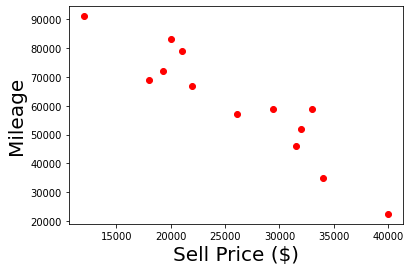

In [14]:
plt.xlabel("Sell Price ($)", fontsize=20)
plt.ylabel("Mileage", fontsize=20)
plt.scatter(df['Sell Price($)'], df['Mileage'], color="red")

In [23]:
dummy_col = pd.get_dummies(df['Car Model'])
dummy_col

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [28]:
final = pd.concat([df, dummy_col], axis="columns")
final = final.drop('Car Model', axis="columns")
final = final.drop('BMW X5', axis="columns")
final

# Audi A5 = 1 0
# Mercedez = 0 1
# BMW X5 = 0 0

,Mileage,Sell Price($),Age(yrs),Audi A5,Mercedez Benz C class
0,69000,18000,6,0,0
1,35000,34000,3,0,0
2,57000,26100,5,0,0
3,22500,40000,2,0,0
4,46000,31500,4,0,0
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,1


In [32]:
X = final[['Audi A5', 'Mercedez Benz C class', 'Age(yrs)', 'Mileage']]
X

,Audi A5,Mercedez Benz C class,Age(yrs),Mileage
0,0,0,6,69000
1,0,0,3,35000
2,0,0,5,57000
3,0,0,2,22500
4,0,0,4,46000
5,1,0,5,59000
6,1,0,5,52000
7,1,0,6,72000
8,1,0,8,91000
9,0,1,6,67000


In [33]:
Y = final['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [34]:
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [35]:
# mercedez benz that is 4 yr old with mileage 45000
reg.predict([[0, 1, 4, 45000]])

c:\Users\MSI\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([36991.3172106])

In [36]:
# BMW X5 that is 7 yr old with mileage 86000
reg.predict([[0, 0, 7, 86000]])

c:\Users\MSI\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([11080.74313221])

In [37]:
reg.score(X, Y)

0.9417050937281083